In [1]:
import pandas as pd
import numpy as np
file = pd.read_csv('./marketing_customer_analysis.csv')
display(file.head())
display(file.shape)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

In [2]:
file = file.drop(['Unnamed: 0'], axis=1)
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
file.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [4]:
numerical = file.select_dtypes(include='number')
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [5]:
categoricals = file.select_dtypes(include='object')
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

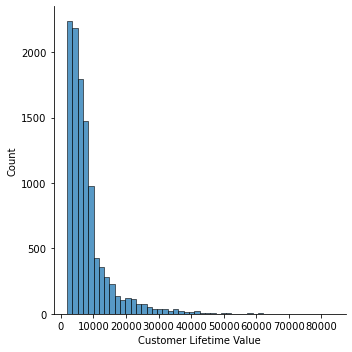

In [7]:
sns.displot(numerical['Customer Lifetime Value'], bins=50)
plt.show()

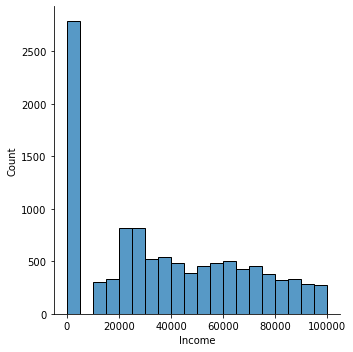

In [8]:
sns.displot(numerical['Income'], bins=20)
plt.show()

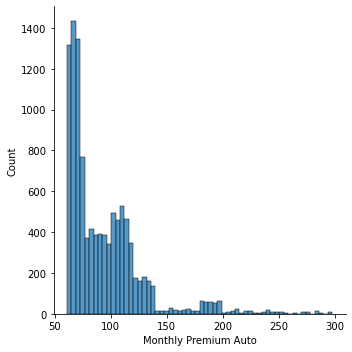

In [9]:
sns.displot(numerical['Monthly Premium Auto'], bins=60)
plt.show()

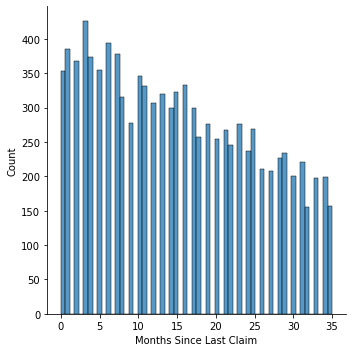

In [10]:
sns.displot(numerical['Months Since Last Claim'], bins=60)
plt.show()

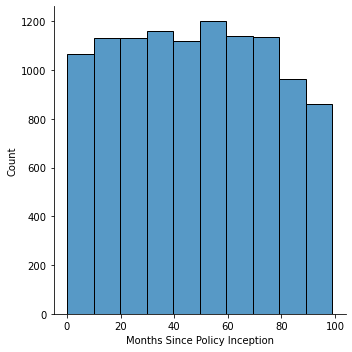

In [11]:
sns.displot(numerical['Months Since Policy Inception'], bins=10)
plt.show()

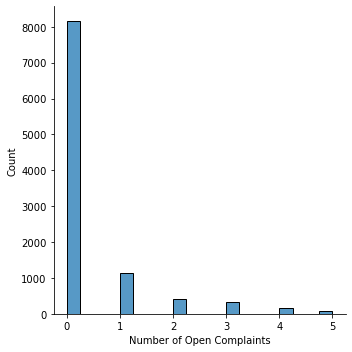

In [12]:
sns.displot(numerical['Number of Open Complaints'], bins=20)
plt.show()

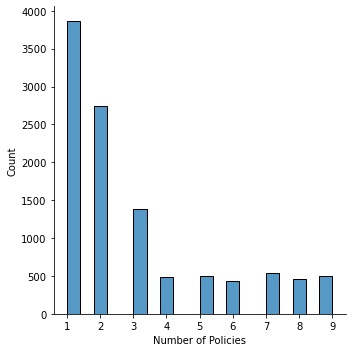

In [13]:
sns.displot(numerical['Number of Policies'], bins=20)
plt.show()

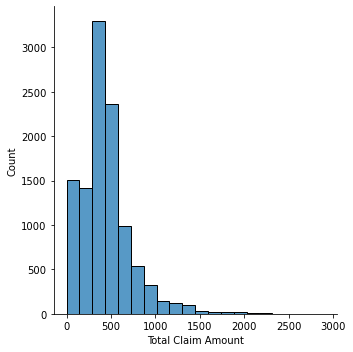

In [14]:
sns.displot(numerical['Total Claim Amount'], bins=20)
plt.show()

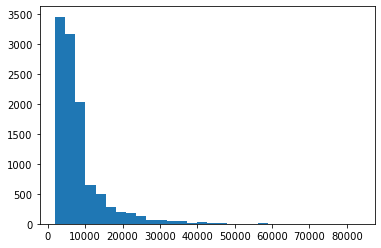

In [15]:
plt.hist(x="Customer Lifetime Value", data=numerical, bins=30)
plt.show()

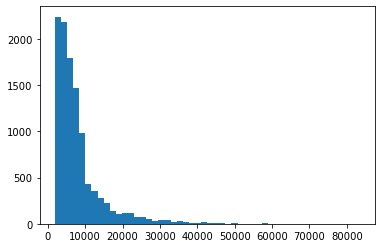

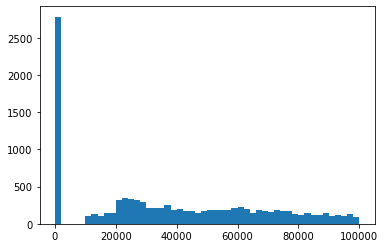

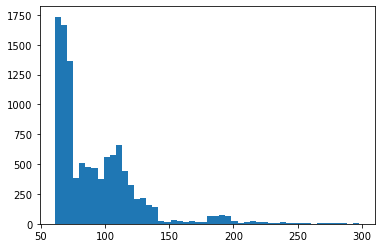

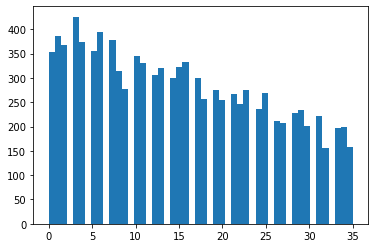

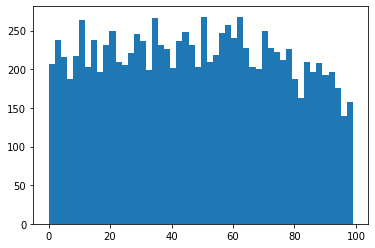

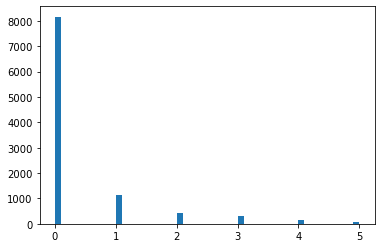

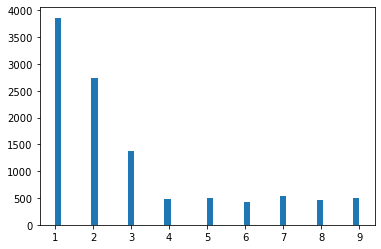

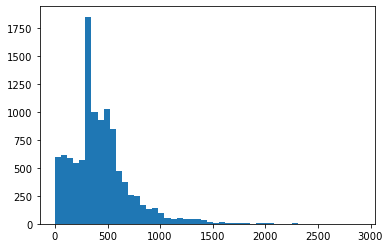

In [16]:
for b in numerical.columns:
    plt.hist(x=b, data=numerical, bins=50)
    plt.show()

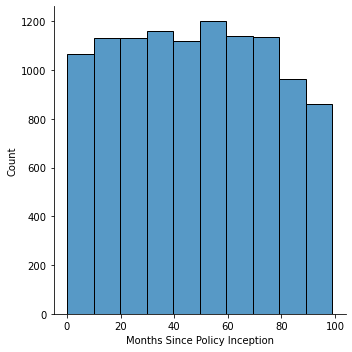

In [17]:
sns.displot(numerical['Months Since Policy Inception'], bins=10)
plt.show()

# for the statement of 'Do the distributions for different numerical variables look like a normal distribution'

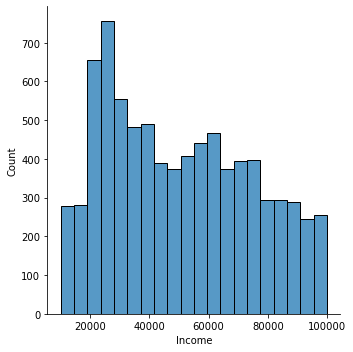

In [19]:
sns.displot(data= numerical['Income'][numerical['Income'] >0], bins=20)
plt.show()

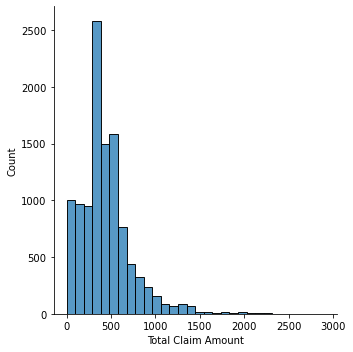

In [20]:
sns.displot(data= numerical['Total Claim Amount'], bins=30)
plt.show()

In [23]:
cor_mat = numerical.corr()
cor_mat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


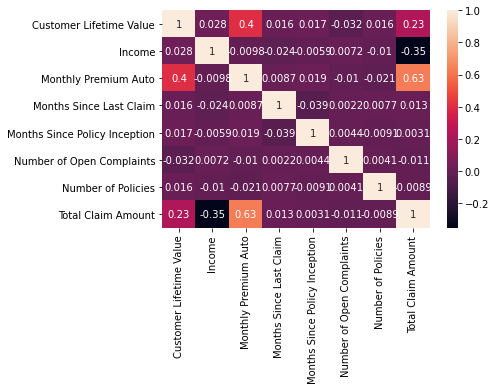

In [24]:
sns.heatmap(cor_mat, annot=True)
plt.show()

In [ ]:
# they are not highly corrolated so we cannot drop anything.

## round 5

In [29]:
# X,y Split
y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [31]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

In [38]:
Edit = MinMaxScaler().fit(numerical)
alist = Edit.transform(numerical)
alist

data_normalized = pd.DataFrame(alist, columns=numerical.columns) 

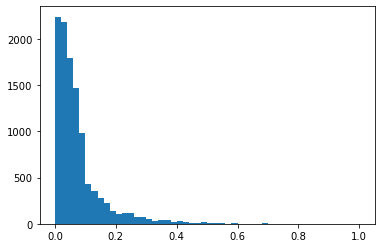

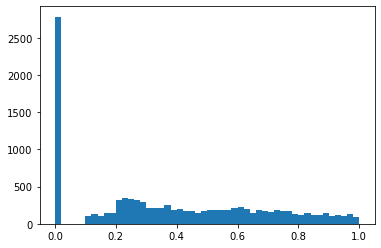

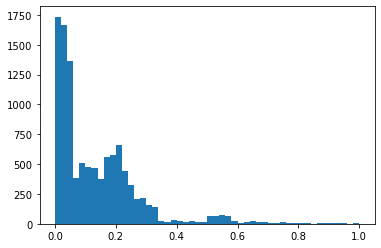

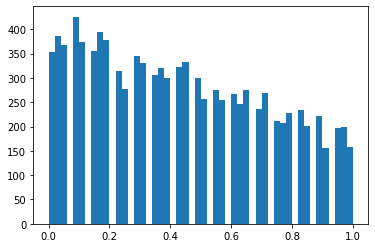

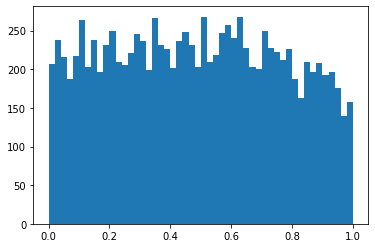

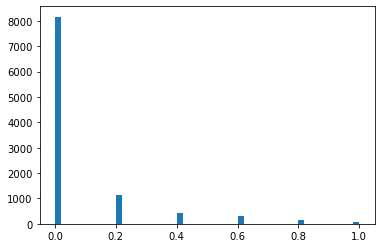

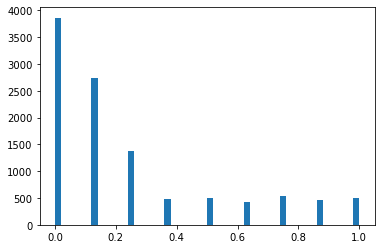

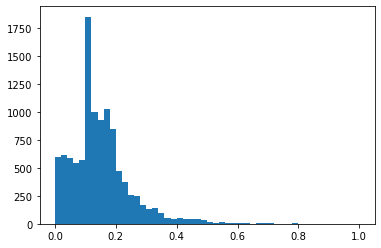

In [39]:
for col in data_normalized.columns:
    plt.hist(x=col, data=data_normalized, bins=50)
    plt.show()

In [41]:
pd.DataFrame(alist, columns=numerical.columns) 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,NaN,0.313131,NaN,0.750,0.244657
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,NaN,0.404040,NaN,0.750,0.419717
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213674
